## Get dataset using Kaggle API

### Import libraries 

In [227]:
import pandas as pd
import numpy as np

# tool to read data csv file (it is faster than pandas and can read files from .zip)
import datatable as dt

import matplotlib.pyplot as plt
import seaborn as sns

# Alias for set_theme(), which is the preferred interface
sns.set()

import plotly.express as px

from wordcloud import WordCloud, STOPWORDS

# display and store Matplotlib plots within a Python Jupyter notebook (no need to use .show())
# %matplotlib inline

#### Install kaggle library

In [2]:
# !pip install kaggle

#### Add credentials used for Kaggle API

In [3]:
# # try in bash (if not working in Jupyter) create folder .kaggle and copy kaggle.json (kaggle api key) to it
# !mkdir ~/.kaggle
# !cp ~/Downloads/kaggle.json ~/.kaggle/kaggle.json

### Search for datasets

In [2]:
# search for the dataset
# !kaggle datasets list -s 'fake-news'

ref                                                                title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/clmentbisaillon/fake-and-real-news-dataset                Fake and real news dataset                     41MB  2020-03-26 18:51:15          54049       1353  0.88235295       
datasets/hassanamin/textdb3                                        Fake News                                      11MB  2019-03-01 10:09:42           3965         70  0.64705884       
datasets/mrisdal/fake-news                                         Getting Real about Fake News                   19MB  2016-11-25 22:29:09          22782        509  0.7941176        
datasets/ruchi798/source-based-news-classification                 Source b

### Dowload datasets

In [3]:
# # https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv
# !kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# # https://www.kaggle.com/datasets/ruchi798/source-based-news-classification
# !kaggle datasets download -d ruchi798/source-based-news-classification

# # https://www.kaggle.com/datasets/mrisdal/fake-news
# !kaggle datasets download -d mrisdal/fake-news

# # https://www.kaggle.com/datasets/jruvika/fake-news-detection
# !kaggle datasets download -d jruvika/fake-news-detection

# # https://www.kaggle.com/datasets/jillanisofttech/fake-or-real-news
# !kaggle datasets download -d jillanisofttech/fake-or-real-news

# # https://www.kaggle.com/datasets/corrieaar/disinformation-articles
# !kaggle datasets download -d corrieaar/disinformation-articles

# # https://www.kaggle.com/datasets/techykajal/fakereal-news
# !kaggle datasets download -d techykajal/fakereal-news


  0%|          | 0.00/19.4M [00:00<?, ?B/s]
  5%|5         | 1.00M/19.4M [00:00<00:03, 6.04MB/s]
 15%|#5        | 3.00M/19.4M [00:00<00:01, 10.0MB/s]
 26%|##5       | 5.00M/19.4M [00:00<00:01, 13.4MB/s]
 36%|###6      | 7.00M/19.4M [00:00<00:00, 14.8MB/s]
 46%|####6     | 9.00M/19.4M [00:00<00:01, 9.02MB/s]
 57%|#####6    | 11.0M/19.4M [00:01<00:00, 10.7MB/s]
 67%|######6   | 13.0M/19.4M [00:01<00:00, 10.6MB/s]
 88%|########7 | 17.0M/19.4M [00:01<00:00, 13.6MB/s]
100%|##########| 19.4M/19.4M [00:01<00:00, 13.0MB/s]



  0%|          | 0.00/4.89M [00:00<?, ?B/s]
 20%|##        | 1.00M/4.89M [00:00<00:00, 6.31MB/s]
 61%|######1   | 3.00M/4.89M [00:00<00:00, 10.4MB/s]
100%|##########| 4.89M/4.89M [00:00<00:00, 13.2MB/s]



  0%|          | 0.00/11.5M [00:00<?, ?B/s]
  9%|8         | 1.00M/11.5M [00:00<00:01, 6.30MB/s]
 26%|##6       | 3.00M/11.5M [00:00<00:00, 10.2MB/s]
 44%|####3     | 5.00M/11.5M [00:00<00:00, 13.8MB/s]
 61%|######1   | 7.00M/11.5M [00:00<00:00, 14.5MB/s]
 79%|#######8  | 9.00M/11.5M [00:00<00:00, 16.0MB/s]
 96%|#########5| 11.0M/11.5M [00:00<00:00, 15.0MB/s]
100%|##########| 11.5M/11.5M [00:00<00:00, 14.3MB/s]



  0%|          | 0.00/118M [00:00<?, ?B/s]
  1%|          | 1.00M/118M [00:00<00:18, 6.50MB/s]
  3%|2         | 3.00M/118M [00:00<00:12, 9.76MB/s]
  5%|5         | 6.00M/118M [00:00<00:08, 13.4MB/s]
  7%|6         | 8.00M/118M [00:00<00:07, 15.3MB/s]
  8%|8         | 10.0M/118M [00:00<00:07, 15.4MB/s]
 10%|#         | 12.0M/118M [00:00<00:07, 14.3MB/s]
 13%|#2        | 15.0M/118M [00:01<00:06, 17.5MB/s]
 15%|#5        | 18.0M/118M [00:01<00:05, 17.5MB/s]
 17%|#6        | 20.0M/118M [00:01<00:06, 16.0MB/s]
 20%|#9        | 23.0M/118M [00:01<00:05, 17.7MB/s]
 22%|##2       | 26.0M/118M [00:01<00:04, 19.8MB/s]
 24%|##3       | 28.0M/118M [00:01<00:04, 19.7MB/s]
 25%|##5       | 30.0M/118M [00:01<00:05, 15.5MB/s]
 29%|##8       | 34.0M/118M [00:02<00:04, 19.4MB/s]
 31%|###       | 36.0M/118M [00:02<00:04, 19.4MB/s]
 32%|###2      | 38.0M/118M [00:02<00:05, 16.7MB/s]
 35%|###4      | 41.0M/118M [00:02<00:04, 19.8MB/s]
 37%|###7      | 44.0M/118M [00:02<00:04, 17.2MB/s]
 40%|###9      | 47.


  0%|          | 0.00/844k [00:00<?, ?B/s]
100%|##########| 844k/844k [00:00<00:00, 5.18MB/s]
100%|##########| 844k/844k [00:00<00:00, 5.15MB/s]


### Create folder for datasets
#### Move dataset to data directory

In [4]:
# !mkdir data
# !mv fake-and-real-news-dataset.zip data
# !mv source-based-news-classification.zip data
# !mv fake-news.zip data
# !mv fake-news-detection.zip data
# !mv fake-or-real-news.zip data
# !mv disinformation-articles.zip data

## Explore Datasets

## 1. fake-and-real-news-dataset
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [37]:
# read data from .csv in .zip folder
fake_df_1 = dt.fread('data/fake-and-real-news-dataset.zip/Fake.csv').to_pandas()
true_df_2 = dt.fread('data/fake-and-real-news-dataset.zip/True.csv').to_pandas()
fake_df_1.sample(5)

,title,text,subject,date
1759,Mike Pence Just Dropped A TERRIFYING Bombshel...,"On Monday, Vice President Mike Pence traveled ...",News,"April 17, 2017"
19082,UNPRECEDENTED: New York Times To Run 30 Sec Ad...,The New York Times is set to launch a televisi...,left-news,"Feb 26, 2017"
3309,Kellyanne Conway Cannot Name One Performer Lin...,Donald Trump is desperately trying to find A-l...,News,"December 22, 2016"
3413,Trump Advisor’s Stupidity Makes CNN Host EXPLO...,"This morning, CNN host Chris Cuomo found himse...",News,"December 14, 2016"
16708,TEEN WEARING CONFEDERATE FLAG SHIRT TO MICHIGA...,A student at a Michigan high school stood up f...,Government News,"Mar 16, 2016"


In [38]:
# add labels: add column 'target' where 0 = real, 1 = fake 
fake_df_1['label'] = 1
true_df_2['label'] = 0

# check new shape
fake_df_1.shape, true_df_2.shape

((23481, 5), (21417, 5))

In [39]:
raw_concat_df = pd.concat([fake_df_1, true_df_2], ignore_index=True)
raw_concat_df.sample(3)

,title,text,subject,date,label
1521,Deputy Attorney General PISSED; Trump Ordered ...,Just when you think you re starting to figure ...,News,"May 11, 2017",1
27485,Factbox: First 100 days of Trump on Twitter,(Reuters) - President Donald Trump has cemente...,politicsNews,"April 28, 2017",0
17545,JUST IN: “Pit Bull” Attorney For Special Couns...,Is there a single person left on Robert Muelle...,left-news,"Dec 8, 2017",1


In [ ]:
raw_concat_df.info()

In [ ]:
raw_concat_df.isnull().sum()

In [75]:
raw_concat_df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

#### Plot subject vs label

In [88]:
raw_concat_df.groupby('subject')['label'].sum()

subject
Government News    1570
Middle-east         778
News               9050
US_News             783
left-news          4459
politics           6841
politicsNews          0
worldnews             0
Name: label, dtype: int64

In [155]:
# plot using plotly.express
fig = px.histogram(raw_concat_df, x='subject', color='label', barmode='group', height=400)
fig.show()

In [254]:
# change politicsNews to politics, News to worldnews and plot again
raw_concat_df['subject'].replace({'politicsNews':'politics', 'News':'worldnews'}, inplace=True)

# plot using plotly.express
# fig = px.histogram(raw_concat_df, x='subject', color='label', barmode='group', height=400)
# fig.show()

df_plt = raw_concat_df.groupby(['subject', 'label']).size().reset_index()
df_plt['percentage'] = raw_concat_df.groupby(['subject', 'label']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).values
df_plt.columns = ['Subject', 'Label', 'Counts', 'Percentage']

px.bar(df_plt, x='Subject', y=['Counts'], color='Label', text=df_plt['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

### Plot title

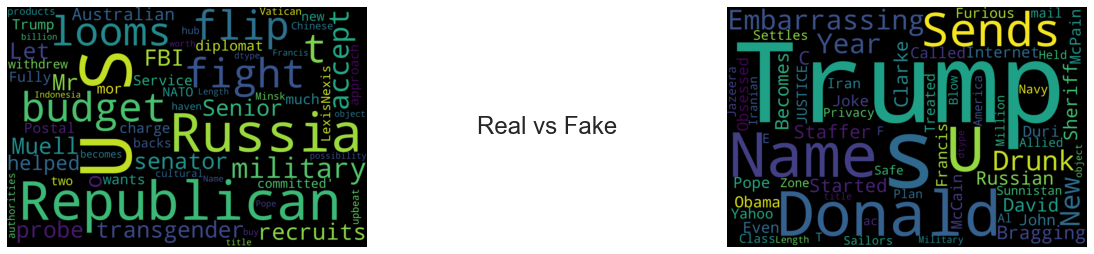

In [255]:
# plot title usin matplotlib and wordcloud

real_title = raw_concat_df.title[raw_concat_df['label']==0]
fake_title = raw_concat_df.title[raw_concat_df['label']==1]

def plot_fake_vs_real_news(real, fake):
    wordcloud_real = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS).generate(str(real))
    wordcloud_fake = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS).generate(str(fake))

    # # plot the WordCloud image  
    plt.subplots(figsize=(15, 7))

    plt.subplot(1, 3, 1)
    plt.imshow(wordcloud_real, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

    plt.subplot(1, 3, 3)
    plt.imshow(wordcloud_fake, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

    plt.suptitle('Real vs Fake', y=0.5, va='center', size=24)
    
plot_fake_vs_real_news(real_title, fake_title)
plt.show()

### Plot text

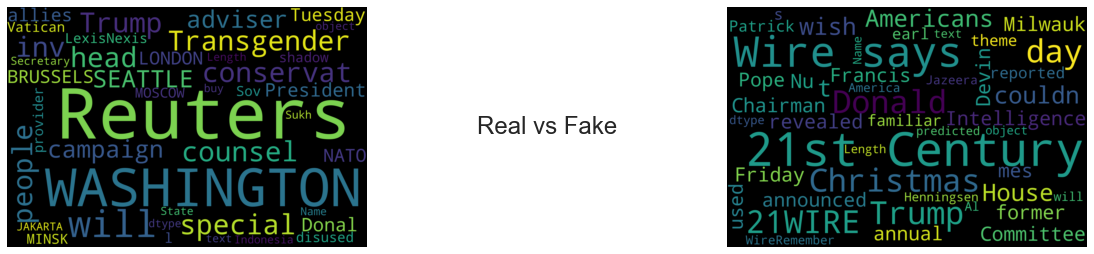

In [239]:
# plot text usin matplotlib and wordcloud

real_text = raw_concat_df.text[raw_concat_df['label']==0]
fake_text = raw_concat_df.text[raw_concat_df['label']==1]

plot_fake_vs_real_news(real_text, fake_text)
plt.show()

### Expand date into day, month, year

In [240]:
# translate date into datetime format where possible
df = raw_concat_df.copy()

def extract_day_month_year(date):
    try:
        return pd.to_datetime(date, infer_datetime_format=True)
    except:
        return np.nan
    
df['Date'] = df.apply(lambda row: extract_day_month_year(row['date']), axis = 1)
df.sample(3)

,title,text,subject,date,label,Date
2711,The Best Way To Get Rid Of ‘President Steve Ba...,"Donald Trump was once a Democrat, but that s n...",worldnews,"February 2, 2017",1,2017-02-02
24734,Trump says Democratic leaders should come to W...,WASHINGTON (Reuters) - President Trump told re...,politics,"October 13, 2017",0,2017-10-13
16571,TOWN VOTES To Change Columbus Day Name Because...,"I ll bet you re thinking this is a joke, right...",Government News,"Jun 6, 2016",1,2016-06-06


In [241]:
# check null values
df.isnull().sum()

title       0
text        0
subject     0
date        0
label       0
Date       10
dtype: int64

In [242]:
# check shpe for future comparison
df.shape

(44898, 6)

In [243]:
# drop nan values and check the shape of df
df = df.dropna()
df.shape

(44888, 6)

In [244]:
# add columns for day, month, year
df['day'] = df.apply(lambda row: row['Date'].day, axis = 1)
df['month'] = df.apply(lambda row: row['Date'].month, axis = 1)
df['year'] = df.apply(lambda row: row['Date'].year, axis = 1)

# drop redundant date, Date columns
df.drop(['date', 'Date'], axis=1, inplace=True)
df.sample(3)

,title,text,subject,label,day,month,year
25310,U.S. consumer agency defends student loan refo...,WASHINGTON (Reuters) - The U.S. consumer finan...,politics,0,8,9,2017
34233,Republican Trump backed Iraq war in 2002 inter...,(Reuters) - Republican presidential front-runn...,politics,0,19,2,2016
42990,China says North Korean situation more serious...,BEIJING (Reuters) - The situation on the Korea...,worldnews,0,21,9,2017


### Plot correlation between date and label

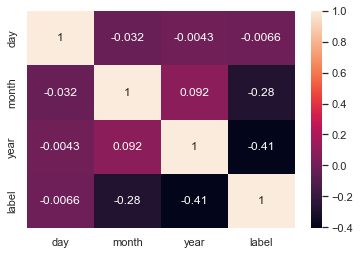

In [245]:
heatmap = sns.heatmap(df[['day', 'month', 'year', 'label']].corr(), annot = True)
sns.set(rc={'figure.figsize':(7,5)})

### Drop redundant df columns for next stage (cleaning text and feature engineering)

In [246]:
final_df_1 = df[['text', 'label']].copy()
final_df_1.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


## 2. source-based-news-classification
https://www.kaggle.com/datasets/ruchi798/source-based-news-classification

In [35]:
# read data from .csv in .zip folder
raw_df_3 = dt.fread('data/source-based-news-classification.zip/news_articles.csv').to_pandas()
raw_df_3.sample(3)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
1964,Vincent Taliercio,2016-10-26T22:46:39.351+03:00,no title,feds born to illegals in year of all us bir...,english,westernjournalism.com,http://static.westernjournalism.com/wp-content...,bias,Real,title,un declares junk food human rights issue says ...,True
1120,Daniel Greenfield,2016-11-03T18:25:50.147+02:00,fbi believes foreign intel agencies got into ...,obamas doj issued stand down order on clinton ...,english,frontpagemag.com,http://www.frontpagemag.com/sites/default/file...,hate,Real,fbi wiretapped corruption suspect discussing c...,whos really blame corrupting influence money w...,True
1329,Ron Yahaloms,2016-10-28T19:59:00.000+03:00,natural remedies that will help you get rid of...,what we all should be doing first thing in the...,english,naturalnews.com,http://10667-presscdn-0-56.pagely.netdna-cdn.c...,junksci,Fake,survive nuclear fallout,keywords medical equipment stethoscope facts s...,True


In [34]:
copy_raw_df_3 = raw_df_3[['title', 'text', 'author', 'published', 'label']].copy()
copy_raw_df_3['label'].replace({'Real':0, 'Fake':1}, inplace=True)
copy_raw_df_3.sample(3)

,title,text,author,published,label
1273,pour booster les ventes dassault offre un port...,is too much screen time hurting your kids ment...,No Author,2016-11-17T11:45:40.817+02:00,1
1651,obsolete,the democratization of censorship\n september ...,No Author,2016-10-27T04:17:44.960+03:00,1
1095,the antipolice epidemic,time investigating hillary is an attack on all...,Dawn Perlmutter,2016-11-01T07:32:55.132+02:00,0


## 3. fake-news
https://www.kaggle.com/datasets/mrisdal/fake-news

In [44]:
# read data from .csv in .zip folder
fake_df_4 = dt.fread('data/fake-news.zip/fake.csv').to_pandas()
fake_df_4.sample(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
6873,896b79ade660ef43dd1c24e343e13fbf188b648d,0,Colin Taylor,2016-11-02T21:43:00.000+02:00,Trump Silent As Iowa Cop Killer Identified As ...,"Comments \nDuring the middle of the night, the...",english,2016-11-03T19:28:50.209+02:00,occupydemocrats.com,US,10414.0,Trump Silent As Iowa Cop Killer Identified As ...,0.997,http://occupydemocrats.com/wp-content/uploads/...,0,0,0,0,0,bs
6897,19abe08fd55c8e88b631baeaf21071a7562946fa,0,Natalie Dickinson,2016-11-05T02:50:00.000+02:00,A Cop Was Just Fired For Feeding A Homeless Ma...,Comments \nIn one of the more disturbing stori...,english,2016-11-05T05:34:18.012+02:00,occupydemocrats.com,US,10414.0,A Cop Was Just Fired For Feeding A Homeless Ma...,0.000,http://occupydemocrats.com/wp-content/uploads/...,0,1,0,0,0,bs
8909,da1a7569012e01bd8a07dfc1dafbde99523e125a,0,,2016-10-26T21:45:17.392+03:00,Putin: Crimean Integration Into Russian Legal ...,Get short URL 0 23 0 0 The integration of Crim...,english,2016-10-26T21:45:17.392+03:00,sputniknews.com,RU,1616.0,Putin: Crimean Integration Into Russian Legal ...,0.000,https://cdn5.img.sputniknews.com/images/104095...,0,0,8,0,8,bs


In [43]:
fake_df_4['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [40]:
copy_raw_df_4 = raw_df_3[['title', 'text', 'author', 'published']].copy()
copy_raw_df_4['label'] = 1
copy_raw_df_4.sample(3)

,title,text,author,published,label
1410,with donald trump tanking a trump supporter wa...,by jason easley on sun oct th at am republic...,Sarah Jones,2016-10-27T19:49:04.331+03:00,1
1054,bank fines elect democrats,the psychopathic and insincere jihad islams na...,Matthew Vadum,2016-10-28T07:54:59.346+03:00,1
527,biden blames lazy american women for the econo...,email \n\nwednesday on wvhu radios the tom ro...,No Author,2016-10-27T18:45:00.000+03:00,1


## 4. fake-news-detection
https://www.kaggle.com/datasets/jruvika/fake-news-detection

In [49]:
# read data from .csv in .zip folder
raw_df_5 = dt.fread('data/fake-news-detection.zip/data.csv').to_pandas()
raw_df_5.sample(3)

,URLs,Headline,Body,Label
2466,http://dailybuzzlive.com/shattering-grand-illu...,Shattering The Grand Illusion: The Power Of Hu...,Have you ever notice the voice in your head th...,False
418,http://beforeitsnews.com/sports/2017/09/50-the...,50 & The Inspirational Journey Of Aaron Judge,50 & The Inspirational Journey Of Aaron Judge\...,False
2673,http://beforeitsnews.com/entertainment/2017/09...,Love Hope Strength Band Announces Partnership ...,Love Hope Strength Band Announces Partnership ...,False


In [50]:
raw_df_5['Label'].unique()

array([ True, False])

In [51]:
copy_raw_df_5 = raw_df_5[['Headline', 'Body', 'Label']].copy()
copy_raw_df_5.rename(columns={'Headline': 'title', 'Body': 'text', 'Label': 'label'}, inplace=True)
copy_raw_df_5['label'].replace({True:0, False:1}, inplace=True)
copy_raw_df_5.sample(3)

,title,text,label
1533,"Hey You Guys, I Found a Dude Who Got Actual Vi...",(Before It's News)\nI posted the Video showing...,1
3636,Hey Mr. Girardi... Respect,Sit down. Buckle up. Take a deep breath. JOE G...,1
1637,'Spielberg': A worthy look at the famed filmmaker,"(CNN) For film fans, the first half of ""Spielb...",0


## 5. fake-or-real-news
https://www.kaggle.com/datasets/jillanisofttech/fake-or-real-news

In [70]:
# read data from .csv in .zip folder
raw_df_6 = dt.fread('data/fake-or-real-news.zip/fake_or_real_news.csv', header=True).to_pandas()
raw_df_6.head(3)

,C0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL


In [71]:
raw_df_6.groupby('label')['C0'].nunique().sort_values(ascending=False)

label
REAL    3171
FAKE    3164
Name: C0, dtype: int64

In [74]:
copy_raw_df_6 = raw_df_6.copy()
copy_raw_df_6['label'].replace({'REAL':0, 'FAKE':1}, inplace=True)
copy_raw_df_6.sample(3)

,C0,title,text,label
5747,8700,Black Trump Supporter: ‘We need somebody that ...,Black Trump Supporter: ‘We need somebody that ...,1
3285,2300,Think Indiana is bad? It's legal to deny servi...,As the national furor continues over a controv...,0
720,10001,What A Hillary Presidency Would Bring,"Behind the headlines - conspiracies, cover-ups...",1


## 6. disinformation-articles
https://www.kaggle.com/datasets/corrieaar/disinformation-articles

In [20]:
# # read data from .csv in nested .zip folder
# import zipfile

# with zipfile.ZipFile('data/disinformation-articles.zip') as myzip:
#     with myzip.open('data/data.csv') as myfile:
#         raw_df_7 = dt.fread(myfile).to_pandas()

raw_df_7.sample(5)

,C0,claims_id,claim_published,first_appearance,review_id,is_part_of,claim_reviewed,review_published,review_name,html_text,...,end_time,organization_id,location,organization_name,image_id,image_type,image_content_url,language_id,language_name,language_code
411,411,/claims/1438,2019-08-06T00:00:00+00:00,/news_articles/2267,/claim_reviews/1438,/issues/160,The activities of the Richard Lugar Public Hea...,2019-08-16T00:00:00+00:00,South Ossetia' authorities link atypical plant...,<p>Long-lasting conspiracy theories about the ...,...,NaN,/organizations/288,,Sputnik Osetia,,,,/languages/3,Russian,rus
3809,3809,/claims/4935,2017-10-05T00:00:00+00:00,/news_articles/5804,/claim_reviews/4935,/issues/83,The DPR Prosecutor General's Office has eviden...,2017-10-10T00:00:00+00:00,MH-17 was shot down from a territory controlle...,<p>Recurring disinformation https://euvsdisinf...,...,NaN,/organizations/298,,vesti.ru,,,,,,
3316,3316,/claims/4352,2018-03-08T00:00:00+00:00,/news_articles/5283,/claim_reviews/4352,/issues/102,"""Our American partners called us and asked to ...",2018-03-19T00:00:00+00:00,US ‘rudely and insolently cheated Russia’ duri...,<p>There was no coup in Ukraine four years ago...,...,NaN,/organizations/219,,rt.com,/image_objects/18,http://schema.org/ImageObject,https://api.veedoo.io/images/5e313dc028d7b_log...,,,
4412,4412,/claims/5579,2017-03-28T00:00:00+00:00,/news_articles/6375,/claim_reviews/5579,/issues/65,The Czech Minister of Defence purportedly hand...,2017-03-28T00:00:00+00:00,The Czech Minister of Defence purportedly hand...,<p>Repeating already debunked disinformation: ...,...,NaN,/organizations/341,/countries/64,czechfreepress.cz,/image_objects/4,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3130e1ac587_ima...,,,
1751,1751,/claims/2775,2019-03-16T00:00:00+00:00,/news_articles/3604,/claim_reviews/2775,/issues/141,On the 25th of November 2018 three Ukrainian m...,2019-03-18T00:00:00+00:00,The Kerch straits were Russian territorial wat...,<p>Recurring pro-Kremlin disinformation narrat...,...,NaN,/organizations/89,,Sputnik Italia,/image_objects/3,http://schema.org/ImageObject,https://api.veedoo.io/images/5e313028294e8_xw_...,/languages/8,Italian,ita
